# Installing Packages

In [ ]:
pip install wordcloud

In [ ]:
pip install tika

  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32891 sha256=b77f4ebe60d8de78d5dea94ca637b1be2f0cfbcee96b6cab028be62e9b132b64
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika


#  Dependencies Imported
Libraries:
- scikit 
- gensim 
- nltk
- spacy
- tika
- wordcloud
- matplotlib
- numpy
- pandas
- re

In [ ]:
# scikit
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# gensim
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
from gensim.models import word2vec
from gensim.models import KeyedVectors
from gensim.models import Word2Vec


# nltk
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

nltk.download('stopwords')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

nltk.download('wordnet')



# model
import spacy
import en_core_web_sm

# parsing
from tika import parser

# visulization
from wordcloud import WordCloud
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from matplotlib import pylab
import matplotlib.pyplot as plt

# others
import string
from collections import Counter
import pandas as pd
import numpy as np
import re
import logging

% matplotlib inline

# pretrained embeddings
nlp = en_core_web_sm.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Cosine Similarity for Text Matching

Matching two documents is equivalent to matching two sentences. ( Check example below how two sentences are matched )

Matching Resume and Job :

- Transform Resume Content to one single sentence
- Transform Job Description to one single sentence
- Extract features from the two documents by transforming them into Vectors in defined dimensions
- Apply Cosine Similarity to find the match between these two sentences. 

Shape for Vector Comparison: (2 , dimension)
- Job (dimension, )
- Resume (dimension, )

> From Lecture : NLP II
>> We learnt about the `Cosine similarity` and `Vectorization` ( convert text to number which defines each words as a feature )

In [ ]:
documents = (
"The sky is blue",
"The sun is bright"
)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
print(tfidf_matrix.shape)

(2, 6)


In [ ]:
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)
# first is similar to itself
# first is 33% similar to second sentence

array([[1.        , 0.33609693]])

In [ ]:
cosine_similarity(tfidf_matrix)[0][1] 
# from the matrix compare ith to jth
# so that is compare 0th sentence to 1th sentence

0.3360969272762575

In [ ]:
tfidf_matrix[0].shape

(1, 6)

In [ ]:
cosine_similarity(tfidf_matrix)

array([[1.        , 0.33609693],
       [0.33609693, 1.        ]])

# Initial Analysis 

***(Attention!!! User Input Required to run this Section; If you are looking to run the final output, go to last section Profile Matcher)***


Approaches for Matching
1. CountVectorizer
2. TFIDF Vectorizer
3. Pre Trained Word Embeddings

Similarity Function: Cosine Distance

> From Lecture : NLP II
>> Tokens , Frequence Distribution of Words , TF-IDF 
----



## Input Resume and Job (User Input Required ) 



In [ ]:
#  Parse PDF file using Tika
parsed = parser.from_file('/content/drive/MyDrive/Colab Notebooks/archana_kalburgi_cv.docx')


# pre-processing
# 1. remove all \n{3} with \n\n
# 2. keep \n\n as separation of headings
parsed_resume = re.sub(r'\n{3,}', '\n\n', parsed["content"]).strip()
resume_text = str(parsed_resume)

2021-12-05 21:15:54,715 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2021-12-05 21:15:59,462 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2021-12-05 21:16:00,664 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [ ]:
# Prompt for the Job description.
print("Example You can enter job description from link: https://flatiron.com/careers/open-positions/3400041?gh_jid=3400041&gh_src=64d3b9c11us")
job_text = input("Enter Job description : ") 
# Convert text to string format
job_text = str(job_text)

Example You can enter job description from link: https://flatiron.com/careers/open-positions/3400041?gh_jid=3400041&gh_src=64d3b9c11us
Enter Job description : Software Engineering Intern (Summer 2022) NYC We're looking for 2022 Summer Software Engineering Interns who will help us accomplish our mission to improve lives by learning from the experience of every cancer patient. Here's what you need to know about the internship role, our engineering team and why Flatiron Health is the right next step in building your career.   What You'll Do  Spend 12 weeks embedded in a fast-paced scrum team Design, plan, and build a project under the guidance of an experienced engineering mentor Whiteboard ideas, write code, work with stakeholders, and present your work  Learn more about cancer and the day-to-day intricacies of oncology than you can possibly imagine We have openings for engineering interns across all our different product lines and technology stacks. We welcome engineering students with 

## Defined Common Similarity Comparison Across Approached Explored

> matrixx shape : (2, dim)

In [ ]:
def calculate_similarity(matrixx):
  ## from section for "Cosine Similarity" 
  ## [0][1] position gives the matching value for two documents being compared
  matchPercentage = cosine_similarity(matrixx)[0][1] * 100
  matchPercentage = round(matchPercentage, 2) # round to two decimal
  print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")
  return matchPercentage

## Simple Resume - Job Matcher Using Keyword Matching

Keyword matching: check if both the documents have common keywords. If we can use this information, we can find some common matches between two documents.

Example Resume have `Technical skills section` and Job have `Qualifications` section

In [ ]:
def find_keywords(job_text, resume_text, curr_ratio ):
  # gives you the keywords of the job description
  print("Job description Keywords: ")
  print(keywords(job_text, ratio=curr_ratio)) 
  print("\nResume description Keywords: ")
  print(keywords(resume_text, ratio=curr_ratio)) 

In [ ]:
find_keywords(job_text, resume_text, 0.1)

Job description Keywords: 
engineering
product
team
problems
problem
working
code work

Resume description Keywords: 
data
python
learning
machine
technology
technological
technologies
analysis
archanakalburgi
nlp
language
languages
decision
helped
help
web
mining
variables
variable


### CountVectorizer / TFIDF Vectorizer



In [ ]:
# CountVectorizer applied on some collection of strings
# occurences mapped to feature index
text_list = [resume_text, job_text]
cv = CountVectorizer()
count_matrix = cv.fit_transform(text_list)
count_matrix.shape

(2, 349)

In [ ]:
cv_similarity = calculate_similarity(count_matrix)

Your resume matches about 43.48% of the job description.


In [ ]:
# frequencies mapped to feature index
tf_transformer = TfidfTransformer(use_idf=False).fit(count_matrix)
X_train_tf = tf_transformer.transform(count_matrix)
X_train_tf.shape

(2, 349)

In [ ]:
tf_similarity = calculate_similarity(X_train_tf)

Your resume matches about 43.48% of the job description.


In [ ]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(count_matrix)
X_train_tfidf.shape

(2, 349)

In [ ]:
tfidf_similarity = calculate_similarity(X_train_tfidf)

Your resume matches about 30.2% of the job description.


### Initial Results

Keyword Matching, the system does not provide a strong matching result in every common cases. we need better approach to calculate the similarity

----

## Advanced Matching -  using  Pre Trained Word Embeddings for Semantic Matching 

Ref: https://spacy.io/usage/spacy-101#vectors-similarity

If we understand the context around the word, we can get better matches. 

Here exploring Pre trained embeddings English model from Spacy.

### Pretrained Embeddings



> nlp(doc) gives 96 measurements for any sentence



In [ ]:
# Example
# process a sentence using the model
doc = nlp("This is some text that I am processing with Spacy")
# Get the mean vector for the entire sentence (useful for sentence classification etc.)
doc.vector.shape

(96,)

Transform resume and job to the vector representation

In [ ]:
# process a sentence using the model
doc = nlp(resume_text)
# It's that simple - all of the vectors and words are assigned after this point
# Get the vector for 'text':
print(len(doc[3].vector))
print(len(doc[1].vector))

96
96


As we are looking for sentence level vector for similarity comparison, we will need to find the mean vector for the entire sentence which will represent our document as a whole.

In [ ]:
# Get the mean vector for the entire sentence 
# (useful for sentence classification etc.)
len(doc.vector)

96

In [ ]:
doc.vector.shape # each word has 96 dimensions, we want a doc to be of 96 dimensions

(96,)

In [ ]:
text_list = [resume_text, job_text]
vectors = [nlp(sentence).vector for sentence in text_list]

print("Total: ", len(vectors), "different vectors")
print("Resume Text: ", len(vectors[0]), "measurements")
print("Job Text: ", len(vectors[1]), "measurements")
pre_embeddings_similarity = calculate_similarity(vectors)

Total:  2 different vectors
Resume Text:  96 measurements
Job Text:  96 measurements
Your resume matches about 76.18% of the job description.


### Initial Results

Pretrained embeddings similarity matches good on both positive and negative samples, making it not reliable.

## Comparison of Similarities for the User Input Above

In [ ]:
print("CountVectorizer Similarity: ", cv_similarity)
print("TF Similarity: ", tf_similarity)
print("TFIDF Similarity: ", tfidf_similarity)
print("Pre Trained Embeddings Similarity: ", pre_embeddings_similarity)
# print("Embeddings Similarity: ", embeddings_similarity)

CountVectorizer Similarity:  43.48
TF Similarity:  43.48
TFIDF Similarity:  30.2
Pre Trained Embeddings Similarity:  76.18


# Results from Initial Analysis

From the initial analysis done on comparison for the resume with multiple jobs showed that pre trained embeddings actually preforming poorly compared to the keyword matching approaches.

With the understanding of these results, if semantic similarity makes more sense as resume and job language are mostly around the same lines, we thought of building our own embeddings model which corpus is fixed to job description. This would allow us to match the specific language and context around the words for better matches.

----

# Approach: Train our own Embeddings using Word2Vec
We have scraped job data from LinkedIn to build this word embeddings instead of keyword matching or pretrained embeddings to get more optimum results.


> From Lecture: NLP III
>> Learnt about Genism and Word2Vec Models

# Datasets

## Linkedin Scraped Job Datasets

> From Lecture: API/Web Scraping



In [ ]:
df = pd.concat(pd.read_excel('/content/drive/MyDrive/660-jobs-data/all_scrapped_jobs.xlsx', sheet_name=None), ignore_index=True)

In [ ]:
df.describe

<bound method NDFrame.describe of                                                   title  ...                   place
0          Process Manufacturing Engineer (Entry Level)  ...                     NaN
1     Entry Level Engineer / Engineering Development...  ...                     NaN
2                                      Quality Engineer  ...                     NaN
3          Process Manufacturing Engineer (Entry Level)  ...                     NaN
4     Entry Level Global Product Development - Hardw...  ...                     NaN
...                                                 ...  ...                     ...
2864  Software Engineer Intern - Security Master (Su...  ...  Los Angeles, CA Remote
2865               DevOps Engineer Intern (Summer 2022)  ...              Irvine, CA
2866  Field/Office Engineer Intern - Heavy Civil - N...  ...            Honolulu, HI
2867  Field/Office Engineer Intern - Central Distric...  ...            Lonetree, CO
2868    Software Engineer Inter

In [ ]:
df.columns

Index(['title', 'company', 'location', 'date', 'link', 'apply_link',
       'description', 'seniority_level', 'job_function', 'place'],
      dtype='object')

## Resume Datasets





Given a set of resumes, with different file types, such as doc, Docx, and pdf, those files will be processed by Tika (http://tika.apache.org) to get the raw text, where table layouts, font type, and font colors will be removed.


> From Lecture : Web ScrapingIII 4. Parse PDF Files

Note: We have collected few resumes but not using this for word embeddings training yet.  The idea is to explore this for future scope.

In [ ]:
# # 4.1. Parse PDF file using Tika
parsed = parser.from_file('/content/drive/MyDrive/Colab Notebooks/archana_kalburgi_cv.docx')

# Print meta data of the pdf file
# print(parsed["metadata"])
# Print the text of the pdf file
# print(parsed["content"])


# remove all \n{3} with \n\n
# keep \n\n as separation of headings
parsed_resume = re.sub(r'\n{3,}', '\n\n', parsed["content"]).strip()

In [ ]:
print(parsed_resume)

ARCHANA KALBURGI 
archanakalburgi@gmail.com   https://archanakalburgi.github.io 
EDUCATION 
Stevens Institute of Technology GPA: 4.0 Masters of Science, Machine Learning Jan 2021 - (Expected) Dec, 2022 
Visvesvaraya Technological University 
Bachelor of Engineering, Computer Science 2011 - 2015 
COURSES 
Machine Learning Fundamentals and Applications, Knowledge Discovery and Data Mining, Deep Learning, Web Mining 
EXPERIENCE 
IOP Technologies Aug 2018 - March, 2020 Data Engineer Bangalore, Karnataka 
· Designed and developed data ingestion pipeline (ETL) from 4 different structured data sources · Implemented web scraping modules using Beautiful Soup 
· Helped develop ML module for predicting prices to help make buy/sell decision for electricity units in the Australian market using Facebook’s Prophet (Python) 
PROJECTS 
Job Change Prediction (Python) 
· Implemented machine learning (ML) algorithms over Kaggle HR Analytic data set to predict if an employee would quit or stay in the compa

# Data Analysis

## Raw Data (Job and Resume) Visualization using Displacy



> From Lecture: NLP III 
>> Learnt about NLP tagging and using Displacy to visualize text



In [ ]:
# https://spacy.io/usage/visualizers
import spacy
from spacy import displacy
from IPython.core.display import display, HTML
nlp = spacy.load('en')

In [ ]:
ner_text = job_text
ner_doc = nlp(ner_text)
displacy.render(docs=ner_doc, style='ent', jupyter=True)

In [ ]:
#ner_text = resume_text.replace("\n"," ")
ner_doc = nlp(parsed_resume)
displacy.render(docs=ner_doc, style='ent', jupyter=True)

## Exploratory Data Analysis 

The input data collected for Jobs are:
* Title
* Company
* Location
* Date
* Description
* Job Link
* Seniority_level
* job_function
* place


The input data collected for resumes are:


*   Educational data (e.g. school courses, grades, university, type of degree, intermediate and final university examinations, postgraduate studies)
* Job experience (e.g. name of the company, type of employment, industry group, occupational field)
* Technical Skills ...TODO


> From Lecture: NLP I
>> EDA Analysis

>>Missing Value Handling

In [ ]:
df.head()

,title,company,location,date,link,apply_link,description,seniority_level,job_function,place
0,Process Manufacturing Engineer (Entry Level),Engineering and Information Technology,United States,2021-10-21,https://www.linkedin.com/jobs/view/process-man...,https://www.linkedin.com/jobs/view/externalApp...,What Makes Honda The Best?\n\nAre you an innov...,Not Applicable,NaN,NaN
1,Entry Level Engineer / Engineering Development...,Engineering and Information Technology,United States,2021-09-25,https://www.linkedin.com/jobs/view/entry-level...,https://www.linkedin.com/jobs/view/externalApp...,What Makes Honda The Best?\n\nAre you an innov...,Not Applicable,NaN,NaN
2,Quality Engineer,Quality Assurance,United States,2021-10-29,https://www.linkedin.com/jobs/view/quality-eng...,https://www.linkedin.com/jobs/view/externalApp...,What Makes Honda The Best?\n\nAre you an innov...,Not Applicable,NaN,NaN
3,Process Manufacturing Engineer (Entry Level),Engineering and Information Technology,United States,2021-09-25,https://www.linkedin.com/jobs/view/process-man...,https://www.linkedin.com/jobs/view/externalApp...,What Makes Honda The Best?\n\nAre you an innov...,Not Applicable,NaN,NaN
4,Entry Level Global Product Development - Hardw...,Engineering and Information Technology,United States,2021-09-04,https://www.linkedin.com/jobs/view/entry-level...,https://www.linkedin.com/jobs/view/externalApp...,About GM\n\nThere's never been a more exciting...,Not Applicable,NaN,NaN


## Preprocessing Data Analysis of Effective Methods 

> From Lecture: NLP I & II
>> Stop Words and Filtering

>> Punctuation Removal

>> Using Lemmatizer

In [ ]:
def remove_punctuation(text):
    text=" ".join(text.splitlines())
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

data = df[['description']]
#storing the puntuation free text
data['clean_msg']= data['description'].apply(lambda x:remove_punctuation(x))
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#importing nlp library
import nltk
nltk.download('stopwords')
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

data['no_stopwords']= data['msg_tokenied'].apply(lambda x:remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
result =data['no_stopwords'].apply(lambda x:lemmatizer(x))
print(result)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
0       [what makes honda the best  are you an innovat...
1       [what makes honda the best  are you an innovat...
2       [what makes honda the best  are you an innovat...
3       [what makes honda the best  are you an innovat...
4       [about gm  theres never been a more exciting t...
                              ...                        
2864    [who we are  addepar‚äôs mission is to bring d...
2865    [we‚äôre looking for problem solvers innovator...
2866    [requisition id 123599  job level internship  ...
2867    [requisition id 123639  job level internship  ...
2868    [join us as we pursue our vision to make machi...
Name: no_stopwords, Length: 2869, dtype: object


In [ ]:
data

,description,clean_msg,msg_lower,msg_tokenied,no_stopwords
0,What Makes Honda The Best?\n\nAre you an innov...,What Makes Honda The Best Are you an innovato...,what makes honda the best are you an innovato...,[what makes honda the best are you an innovat...,[what makes honda the best are you an innovat...
1,What Makes Honda The Best?\n\nAre you an innov...,What Makes Honda The Best Are you an innovato...,what makes honda the best are you an innovato...,[what makes honda the best are you an innovat...,[what makes honda the best are you an innovat...
2,What Makes Honda The Best?\n\nAre you an innov...,What Makes Honda The Best Are you an innovato...,what makes honda the best are you an innovato...,[what makes honda the best are you an innovat...,[what makes honda the best are you an innovat...
3,What Makes Honda The Best?\n\nAre you an innov...,What Makes Honda The Best Are you an innovato...,what makes honda the best are you an innovato...,[what makes honda the best are you an innovat...,[what makes honda the best are you an innovat...
4,About GM\n\nThere's never been a more exciting...,About GM Theres never been a more exciting ti...,about gm theres never been a more exciting ti...,[about gm theres never been a more exciting t...,[about gm theres never been a more exciting t...
...,...,...,...,...,...
2864,Who We Are\n\nAddepar‚Äôs mission is to bring ...,Who We Are Addepar‚Äôs mission is to bring da...,who we are addepar‚äôs mission is to bring da...,[who we are addepar‚äôs mission is to bring d...,[who we are addepar‚äôs mission is to bring d...
2865,"We‚Äôre looking for problem solvers, innovator...",We‚Äôre looking for problem solvers innovators...,we‚äôre looking for problem solvers innovators...,[we‚äôre looking for problem solvers innovator...,[we‚äôre looking for problem solvers innovator...
2866,Requisition ID: 123599\n\nJob Level: Internshi...,Requisition ID 123599 Job Level Internship D...,requisition id 123599 job level internship d...,[requisition id 123599 job level internship ...,[requisition id 123599 job level internship ...
2867,Requisition ID: 123639\n\nJob Level: Internshi...,Requisition ID 123639 Job Level Internship D...,requisition id 123639 job level internship d...,[requisition id 123639 job level internship ...,[requisition id 123639 job level internship ...


# Feature Engineering for Profile Matcher


In [ ]:
df.columns

Index(['title', 'company', 'location', 'date', 'link', 'apply_link',
       'description', 'seniority_level', 'job_function', 'place'],
      dtype='object')

In [ ]:
# df['place'].unique() # maybe in future scope

In [ ]:
# # Groupby by country
# country = df.groupby("place")
# # Summary statistic of all countries
# country.describe().head()

### Selected Features for Determining Matching

#### Title

In [ ]:
df['title']

0            Process Manufacturing Engineer (Entry Level)
1       Entry Level Engineer / Engineering Development...
2                                        Quality Engineer
3            Process Manufacturing Engineer (Entry Level)
4       Entry Level Global Product Development - Hardw...
                              ...                        
2864    Software Engineer Intern - Security Master (Su...
2865                 DevOps Engineer Intern (Summer 2022)
2866    Field/Office Engineer Intern - Heavy Civil - N...
2867    Field/Office Engineer Intern - Central Distric...
2868      Software Engineer Intern (Remote - Summer 2022)
Name: title, Length: 2869, dtype: object

#### Seniority Level

In [ ]:
df['seniority_level'].unique() # filter on this for Interns

array(['Not Applicable', 'Entry level', 'Internship', nan, 'Associate',
       'Mid-Senior level', 'Director'], dtype=object)

#### Description

In [ ]:
df['description']

0       What Makes Honda The Best?\n\nAre you an innov...
1       What Makes Honda The Best?\n\nAre you an innov...
2       What Makes Honda The Best?\n\nAre you an innov...
3       What Makes Honda The Best?\n\nAre you an innov...
4       About GM\n\nThere's never been a more exciting...
                              ...                        
2864    Who We Are\n\nAddepar‚Äôs mission is to bring ...
2865    We‚Äôre looking for problem solvers, innovator...
2866    Requisition ID: 123599\n\nJob Level: Internshi...
2867    Requisition ID: 123639\n\nJob Level: Internshi...
2868    Join us as we pursue our vision to make machin...
Name: description, Length: 2869, dtype: object

# Training word2vec Model over Job Description Feature

- Preprocessing of Training Data
- Word2Vec Train - Test - Save
- Word2Vec Visualization
- Analysis for Improvements


## Pre - Processing

* Convert to Lower Case
* remove email
            doc = re.sub(r'\S*@\S*\s?', '', doc, flags=re.MULTILINE) 
* remove web addresses
            doc = re.sub(r'http\S+', '', doc, flags=re.MULTILINE) 
* Remove tokens which are digits

      doc = re.sub(r'\b\d+\b', '', doc, flags=re.MULTILINE)
* Remove website addresses "www."
      doc = re.sub(r'www\.\S+', '', doc, flags=re.MULTILINE)
* Remove all non-ascii  characters e.g ‚äôs
      doc = re.sub(r'[^\u0000-\u007F]+', '', doc, flags=re.MULTILINE)
* Replace punctuations with space
* Tokenize each document into a list of unigrams
* only unigrams with 2 or more characters are taken 
* Stop words removal
* Check if the word is made up of english letters and is not alpha-numeric
* strip punctuations and leading/trailing spaces from unigrams
* WordNetLemmatizer to lemmatize token
* Remove alphanumeric tokens like gd17, 11693b3

In [ ]:
def containsNumber(value):
    for character in value:
        if character.isdigit():
            return True
    return False

def custom_tokenize(doc):
  doc = doc.lower()
  doc = re.sub(r'\S*@\S*\s?', '', doc, flags=re.MULTILINE) 
  doc = re.sub(r'http\S+', '', doc, flags=re.MULTILINE)
  doc = re.sub(r'www\.\S+', '', doc, flags=re.MULTILINE)
  doc = re.sub(r'[^\u0000-\u007F]+', '', doc, flags=re.MULTILINE)
  doc = re.sub(r'[^\w\s]', ' ', doc, flags=re.MULTILINE) # replace punctuations by space
  doc = re.sub(r'\b\d+\b', '', doc, flags=re.MULTILINE)
  doc = re.sub(r'[^\w\s]', '', doc, flags=re.MULTILINE) 

  stop_words = set(stopwords.words("english"))
  wordnet_lemmatizer = WordNetLemmatizer()

  return [wordnet_lemmatizer.lemmatize(token.strip(string.punctuation).strip()) \
             for token in nltk.word_tokenize(doc.lower()) \
                 if token not in string.punctuation and \
                  not containsNumber(token) and \
                  token not in stop_words and \
                 len(wordnet_lemmatizer.lemmatize(token.strip(string.punctuation).strip()))>=2]

In [ ]:
# sample = " ".join(custom_tokenize(df.description[0]))
# ner_text = sample
# ner_doc = nlp(ner_text)
# displacy.render(docs=ner_doc, style='ent', jupyter=True)

### Popular Words Visualization

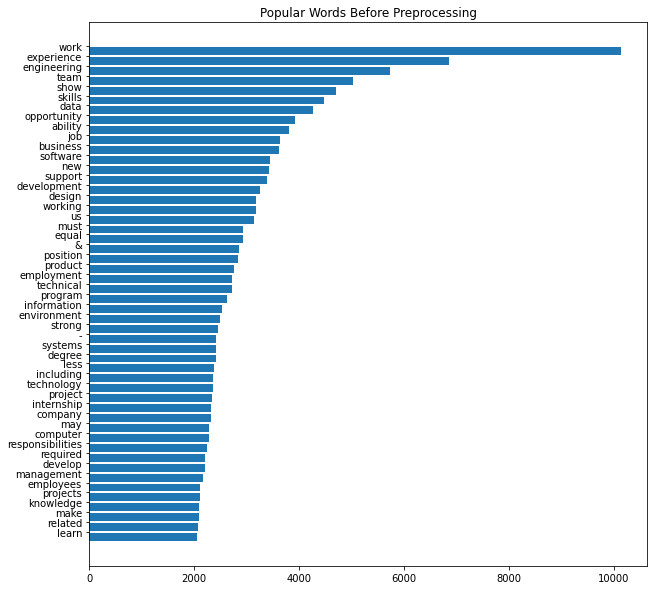

In [ ]:
from nltk.corpus import stopwords
def wordBarGraphFunction(df,column,title, preprocessing = False):
  if preprocessing:
    topic_words = []
    for x in df[column]:
      topic_words = topic_words + (custom_tokenize(x))
  else:
      topic_words = [ z.lower() for y in
                       [ x.split() for x in df['description'] if isinstance(x, str)]
                       for z in y]
  word_count_dict = dict(Counter(topic_words))
  popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
  popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]

  plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
  plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
  plt.title(title)
  plt.show()

plt.figure(figsize=(10,10))
wordBarGraphFunction(df,'description',"Popular Words Before Preprocessing", preprocessing = False)

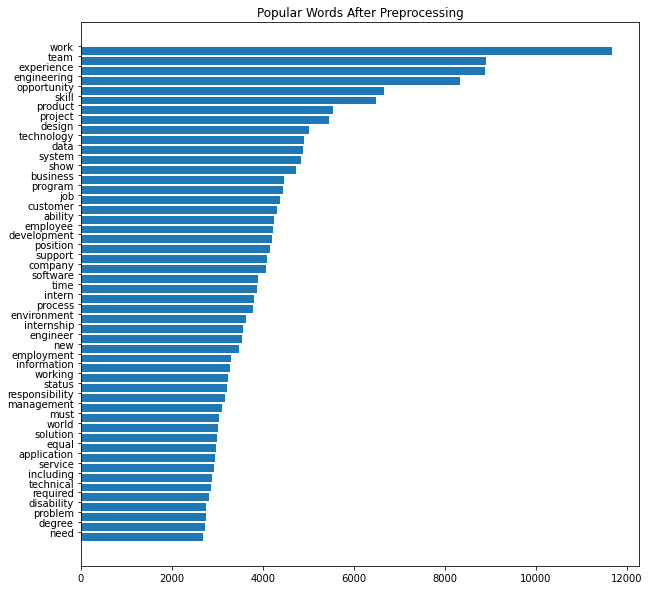

In [ ]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(df,'description',"Popular Words After Preprocessing", preprocessing = True)

## Word2Vec Embeddings

> From Lecure: Word2Vec.pynb


Word2vec captures context, semantic , syntactic similarities.

Semantic similarity:
- how old are you is semantically similar to -> what is your age

Syntactic similarity 
- similarity between the two texts is proportional to the number of identical words in them 

In [ ]:
WORD_VEC_DIMENSION = 300

### Train Word2Vec Model

Input: Corpus ( df.description )

Training Parameters to optimize on:
* PreProcessing Step: custom_tokenize()
* min_count: 1
* window : 5
* size: 300


Ref: https://datascience.stackexchange.com/questions/52964/word2vec-word-embeddings-creates-very-distant-vectors-closest-cosine-similarity

* Suggestions that can help improve the vector quality:

  - Using TFIDF, you can remove stop words in case they are not interesting to you.
  - Pre-process your text to bring them to standard form. For example, lower casing of text, removal of special characters, stripping of spaces.
  - Experiment with varying embedding sizes. Start with as little as 100, as you are interested in only finite number of words.
  - Visualize your vectors using tsne / PCA and projecting them to a 2 or 3 dimensional space.
  - Perform the same for different epochs to see how vectors are converging / diverging.
  - Its also very important to understand your corpus well, so that you know what these vectors imply and how they co-occur.

In [ ]:
df.description

0       What Makes Honda The Best?\n\nAre you an innov...
1       What Makes Honda The Best?\n\nAre you an innov...
2       What Makes Honda The Best?\n\nAre you an innov...
3       What Makes Honda The Best?\n\nAre you an innov...
4       About GM\n\nThere's never been a more exciting...
                              ...                        
2864    Who We Are\n\nAddepar‚Äôs mission is to bring ...
2865    We‚Äôre looking for problem solvers, innovator...
2866    Requisition ID: 123599\n\nJob Level: Internshi...
2867    Requisition ID: 123639\n\nJob Level: Internshi...
2868    Join us as we pursue our vision to make machin...
Name: description, Length: 2869, dtype: object

In [ ]:
# Train your own word vectors using gensim
# print out tracking information
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)
sentences=[ custom_tokenize(doc) for doc in df.description]

# min_count: words with total frequency lower than this are ignored
# size: the dimension of word vector
# window: context window, i.e. the maximum distance 
#         between the current and predicted word 
#         within a sentence (i.e. the length of ngrams)
# workers: # of parallel threads in training
# for other parameters, check https://radimrehurek.com/gensim/models/word2vec.html
wv_model = word2vec.Word2Vec(sentences, \
            min_count=1, size=WORD_VEC_DIMENSION, \
            window=5, workers=4 )

2021-12-05 21:18:08,181 : INFO : collecting all words and their counts
2021-12-05 21:18:08,183 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-12-05 21:18:08,394 : INFO : collected 14436 word types from a corpus of 1065253 raw words and 2869 sentences
2021-12-05 21:18:08,396 : INFO : Loading a fresh vocabulary
2021-12-05 21:18:08,460 : INFO : effective_min_count=1 retains 14436 unique words (100% of original 14436, drops 0)
2021-12-05 21:18:08,462 : INFO : effective_min_count=1 leaves 1065253 word corpus (100% of original 1065253, drops 0)
2021-12-05 21:18:08,526 : INFO : deleting the raw counts dictionary of 14436 items
2021-12-05 21:18:08,528 : INFO : sample=0.001 downsamples 46 most-common words
2021-12-05 21:18:08,529 : INFO : downsampling leaves estimated 1008527 word corpus (94.7% of prior 1065253)
2021-12-05 21:18:08,589 : INFO : estimated required memory for 14436 words and 300 dimensions: 41864400 bytes
2021-12-05 21:18:08,590 : INFO : resetting

### Test word2vec model

In [ ]:
wv_model.similar_by_word('manager')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
2021-12-05 21:18:25,452 : INFO : precomputing L2-norms of word weight vectors


[('mentor', 0.724974513053894),
 ('tenured', 0.6985350847244263),
 ('designer', 0.67963707447052),
 ('qe', 0.6483292579650879),
 ('multidiscipline', 0.6304983496665955),
 ('assigned', 0.6259469985961914),
 ('staff', 0.6216787099838257),
 ('technician', 0.6192497611045837),
 ('sale', 0.6040326356887817),
 ('closely', 0.601628839969635)]

In [ ]:
print("Top 5 words similar to word 'scientist'")
wv_model.wv.most_similar('scientist', topn=5)

Top 5 words similar to word 'scientist'


[('analyst', 0.707678496837616),
 ('architect', 0.684476375579834),
 ('researcher', 0.6818543076515198),
 ('physicist', 0.6698935627937317),
 ('designer', 0.650557279586792)]

In [ ]:
print("Top 5 words similar to word 'engineer'")
wv_model.wv.most_similar('engineer', topn=5)

Top 5 words similar to word 'engineer'


[('developer', 0.7451989650726318),
 ('analyst', 0.6401157975196838),
 ('designer', 0.6314972043037415),
 ('architect', 0.6287281513214111),
 ('engineering', 0.6092355251312256)]

In [ ]:
print("Top 5 words similar to word 'intern'")
wv_model.wv.most_similar('intern', topn=5)

Top 5 words similar to word 'intern'


[('experienced', 0.612639307975769),
 ('internship', 0.5955079197883606),
 ('expect', 0.5773656964302063),
 ('summer', 0.5754691958427429),
 ('senior', 0.5600848197937012)]

In [ ]:
print("Similarity between 'manager' and 'engineer':")
wv_model.wv.similarity('manager', 'engineer')

Similarity between 'manager' and 'engineer':


0.4708756

In [ ]:
print("Similarity between 'scientist' and 'engineer':")
wv_model.wv.similarity('scientist', 'engineer')

Similarity between 'scientist' and 'engineer':


0.5966589

In [ ]:
print("Word vector for 'intern':")
wv_model.wv['intern']

Word vector for 'intern':


array([ 6.33203536e-02, -5.86446762e-01,  6.28974855e-01,  1.20304607e-01,
       -1.91452295e-01,  1.14417660e+00,  1.40025425e+00, -8.35109353e-02,
       -1.54416072e+00,  3.77794921e-01, -2.05130205e-01, -1.43942678e+00,
        8.04282203e-02,  2.88107157e-01,  8.46846282e-01,  1.69269949e-01,
       -1.71660554e+00,  4.20030653e-02, -1.14637625e+00, -1.49277294e+00,
        1.38266611e+00, -9.92017612e-02, -7.96380281e-01,  6.47707522e-01,
       -1.44323289e-01,  2.84711272e-01, -1.81398749e+00,  1.87609291e+00,
       -1.64832389e+00,  2.45540246e-01, -1.18530381e+00,  1.58221102e+00,
       -1.35164535e+00, -1.40341783e+00,  1.30549490e-01,  1.23405135e+00,
       -1.03543246e+00, -2.04624265e-01,  7.50735343e-01,  3.63606691e-01,
       -7.84315169e-01,  4.73145336e-01, -1.15245438e+00,  1.13849068e+00,
        1.06418371e+00,  3.28085452e-01, -2.18114197e-01, -4.93469119e-01,
       -2.98138648e-01, -1.36735380e+00,  7.78243020e-02, -2.24543035e-01,
       -8.62991810e-01,  

In [ ]:
# Check dimension of word vectors
wv_model.vector_size

300

### Save Word2Vec Model

So the model will generate 300-dimensional word vectors, and all we have to do to create a vector is to pass it through the model. 

In [ ]:
# Store just the words + their trained embeddings.
word_vectors = wv_model.wv
word_vectors.save_word2vec_format("vectors.txt")
word_vectors.save("word2vec.wordvectors")

2021-12-05 21:18:25,696 : INFO : storing 14436x300 projection weights into vectors.txt
2021-12-05 21:18:29,093 : INFO : saving Word2VecKeyedVectors object under word2vec.wordvectors, separately None
2021-12-05 21:18:29,096 : INFO : not storing attribute vectors_norm
2021-12-05 21:18:29,361 : INFO : saved word2vec.wordvectors


### Visualize Embeddings

T-SNE, which is an algorithm which reduces our 100 dimension vectors to 2 dimensions. This will give us an idea of whether the model is generally doing a good job of positioning similar terms close to each other in the vector space

In [ ]:
# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')
len(wv[wv.vocab][0])

2021-12-05 21:18:29,375 : INFO : loading Word2VecKeyedVectors object from word2vec.wordvectors
2021-12-05 21:18:29,558 : INFO : setting ignored attribute vectors_norm to None
2021-12-05 21:18:29,560 : INFO : loaded word2vec.wordvectors


300

In [ ]:
#Preprocessing our models vocabulary to make better visualizations 
from nltk.corpus import stopwords

words_vocab= list(wv.vocab)#all the words in the vocabulary. 
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])

Size of Vocabulary: 14436
Few words in Vocabulary ['make', 'honda', 'best', 'innovator', 'hondas', 'core', 'value', 'company', 'unique', 'dream', 'power', 'mentality', 'drive', 'team', 'create', 'intelligent', 'product', 'enhance', 'mobility', 'increase', 'joy', 'people', 'life', 'passion', 'experience', 'fueled', 'challenging', 'spirit', 'push', 'set', 'reach', 'ambitious', 'goal', 'voluntarily', 'reducing', 'carbon', 'dioxide', 'emission', 'developing', 'technology', 'reduce', 'number', 'collision', 'zero', 'respect', 'individual', 'associate', 'contribute', 'highest', 'level']
Size of Vocabulary without stopwords: 14205
Few words in Vocabulary without stopwords ['make', 'honda', 'best', 'innovator', 'hondas', 'core', 'value', 'company', 'unique', 'dream', 'power', 'mentality', 'drive', 'team', 'create', 'intelligent', 'product', 'enhance', 'mobility', 'increase', 'joy', 'people', 'life', 'passion', 'experience', 'fueled', 'challenging', 'spirit', 'push', 'set']


In [ ]:
wv.most_similar('intern')

2021-12-05 21:18:31,539 : INFO : precomputing L2-norms of word weight vectors


[('experienced', 0.612639307975769),
 ('internship', 0.5955079197883606),
 ('expect', 0.5773656964302063),
 ('summer', 0.5754691958427429),
 ('senior', 0.5600848197937012),
 ('analyst', 0.554445207118988),
 ('manager', 0.5461987257003784),
 ('engineer', 0.5424990057945251),
 ('mentoring', 0.5264652967453003),
 ('student', 0.5176998376846313)]

## Visualize similar words around Resume Sections 

In [ ]:
keys = ['experience', 'level', 'skill', 'location', 'title', 'company', 'intern']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in wv.most_similar(word, topn=50):
        words.append(similar_word)
        embeddings.append(wv[similar_word])
    print(word,len(words))
    # print(len(embeddings), len(embeddings[1]))
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

experience 50
level 50
skill 50
location 50
title 50
company 50
intern 50


In [ ]:
print("Embedding clusters:",embedding_clusters[0][0])
#Access vector of the first word only
print("Word Clusters:",word_clusters[:2])

# # check shapes
# word_clusters=np.array(word_clusters)
# embedding_clusters=np.array(embedding_clusters)
# print(word_clusters.shape) # (3, 50)
# print(embedding_clusters.shape) # (3, 50, 300)


Embedding clusters: [-0.19964325  0.1003739  -0.19575131  0.46219856 -0.3422377   0.19884211
  0.3296914  -0.08068076 -0.4269882  -0.08505988 -0.01768747 -0.44917104
  0.09709171  0.98262405  0.72358304  0.033214    0.03914241  0.26804647
  0.07827627 -0.33819893 -0.26488602  0.33997786 -0.81672734 -0.5954362
 -0.5775786   0.15175116 -0.2625165   0.41362298 -0.10732191  0.34310612
  0.06384578 -0.6145901   0.68557316  0.02757345 -0.1024963   0.4210639
 -0.10005257  0.28273544  0.5074609   0.7020924   0.40274355  0.73673356
 -0.00533734  0.19378185 -0.24035974 -0.15283513  0.26860505 -0.08519842
 -0.12338777  0.43770635  0.02423409 -0.30714947 -0.3358416  -0.14951423
  0.25690383 -0.11622645  1.0836016   0.08653882  0.34437212 -0.5708652
 -0.6400541   0.59214073  0.35893914 -0.50514317 -0.31644693  0.82193714
 -0.37202618 -0.5703298  -0.1720011  -0.06302324  0.00651735 -0.12819843
  0.9149337   0.00953477 -0.41630366 -0.11381563  0.48960334 -0.01097718
 -0.41440964  0.5128103  -0.063129

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline  

#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(30, 20))
    

    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    # plt.legend()
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


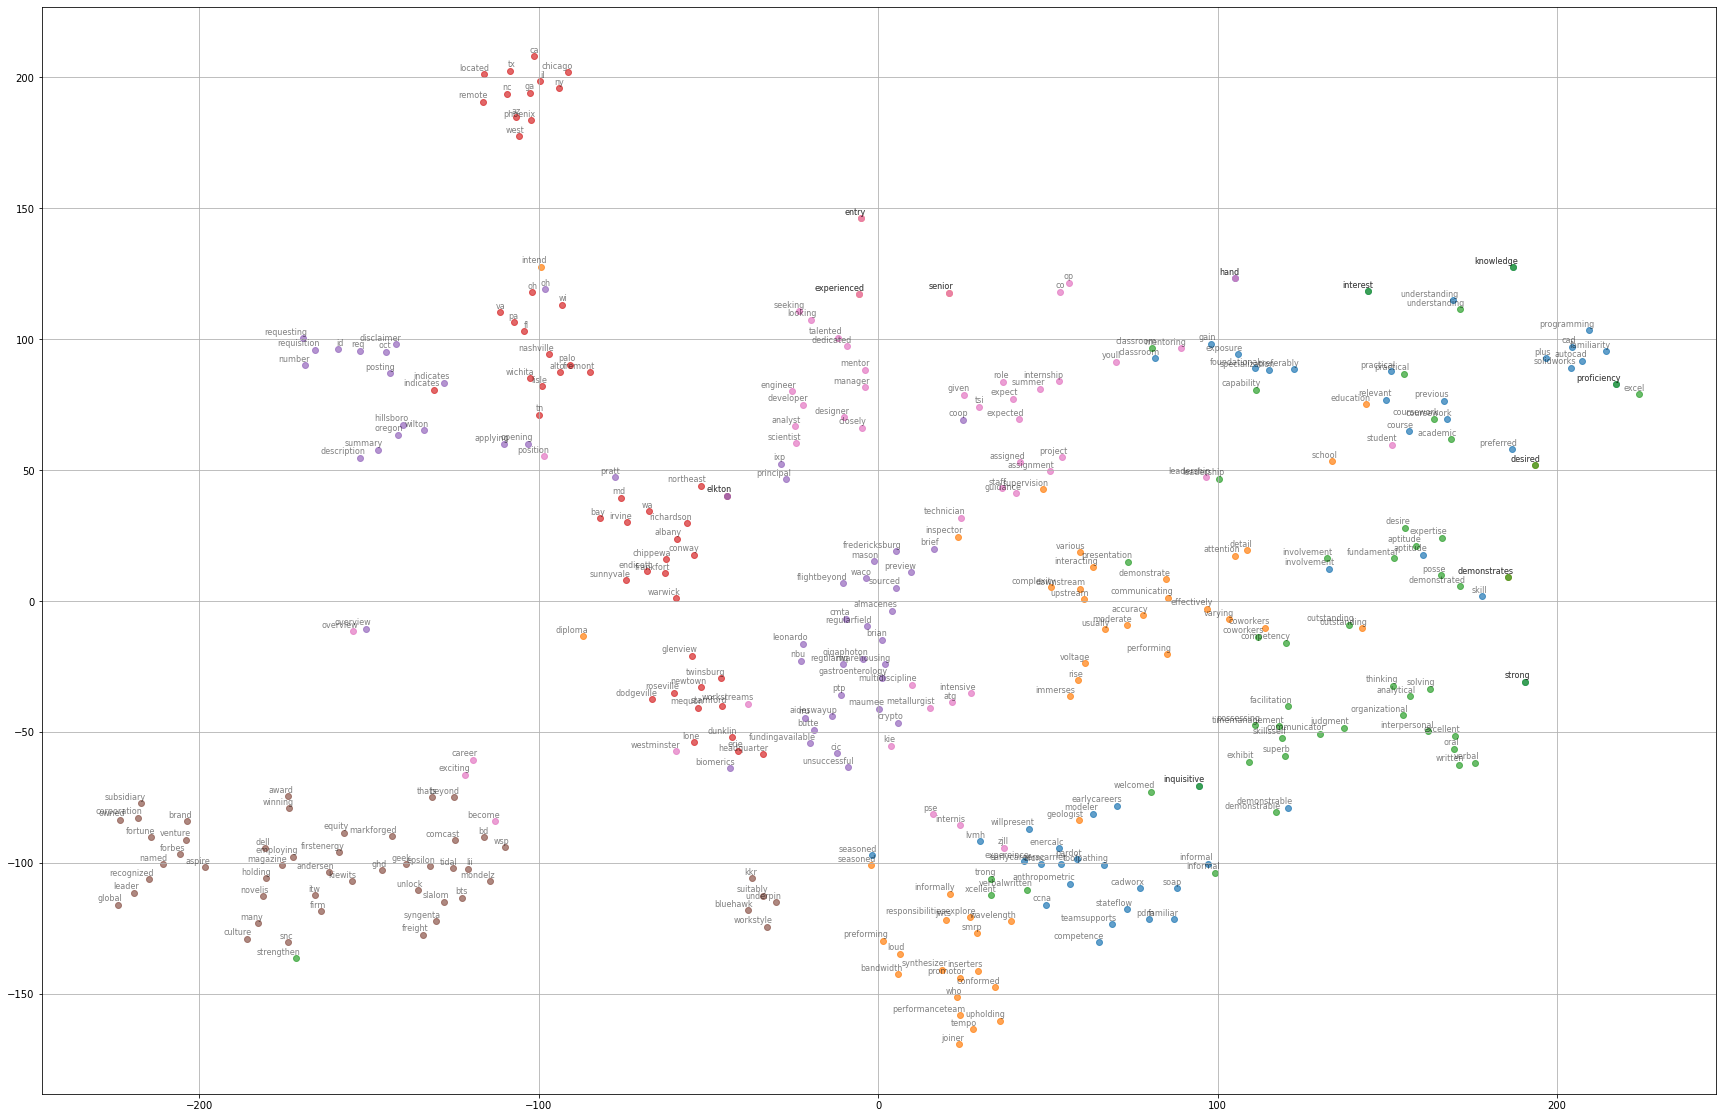

In [ ]:
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=3500, random_state=32) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

## Test Similarity Using Word2Vec Model over Resume and Job

 We've trained our Word2Vec model, now we'll use it to generate document vectors.

https://stackoverflow.com/questions/29760935/how-to-get-vector-for-a-sentence-from-the-word2vec-of-tokens-in-sentence

shape: 252 x 100 -> 1 x 100

There are differet methods to get the sentence vectors :




* Doc2Vec : you can train your dataset using Doc2Vec and then use the sentence vectors.
* Average of Word2Vec vectors : You can just take the average of all the word vectors in a sentence. This average vector will represent your sentence vector.
*Average of Word2Vec vectors with TF-IDF : this is one of the best approach which I will recommend. Just take the word vectors and multiply it with their TF-IDF scores. Just take the average and it will represent your sentence vector.


> TF-IDF removed influence of the most common word

In [ ]:
def convert_doc_to_vector(doc_text):
  words = custom_tokenize(doc_text)

  # Filter the list of vectors to include only those that Word2Vec has a vector for
  vector_list = [wv[word] for word in words if word in wv.vocab]
  # print("shape:",len(vector_list),len(vector_list[0]))

  # average Word2Vec
  # compute average word2vec for each review.
  # sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  
  sent_vec = np.zeros(WORD_VEC_DIMENSION) # as word vectors are of zero length 100, 
  #you might need to change this to 300 if you use google's w2v
  
  cnt_words =0; # num of words with a valid vector in the sentence/review
  for word in words: # for each word in a text
    if word in wv.vocab:
        vec = wv[word]
        sent_vec += vec
        cnt_words += 1
  
  if cnt_words != 0:
      sent_vec /= cnt_words
  # print("average w2v:", sent_vec)
  # print(sent_vec.shape)
  # sent_vectors.append(sent_vec)
  # print(len(sent_vectors))
  # print(len(sent_vectors[0]))

  # Create a list of the words corresponding to these vectors
  words_filtered = [word for word in words if word in wv.vocab]

  # Zip the words together with their vector representations
  word_vec_zip = zip(words_filtered, vector_list) 

  # Cast to a dict so we can turn it into a DataFrame
  word_vec_dict = dict(word_vec_zip)
  doc_df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
  # print(doc_df.head(3))

  # shape: 252 x 100 -> 1 x 100
  # return doc_df, word_vec_dict, sent_vec
  return sent_vec

We got ourselves a dictionary mapping word -> 300-dimensional vector. Now we can use it to build features. 


In [ ]:
vectors = [convert_doc_to_vector(sentence) for sentence in text_list] # text_list = [resume_text, job_text]
print("Total: ", len(vectors), "different vectors")
print("Resume Text: ", len(vectors[0]), "measurements")
print("Job Text: ", len(vectors[1]), "measurements")
embeddings_similarity = calculate_similarity(vectors)

Total:  2 different vectors
Resume Text:  300 measurements
Job Text:  300 measurements
Your resume matches about 50.59% of the job description.


# Profile Matcher


    


## Architecture

## Assumptions


> Language Supported: English

TODO State all assumption for scraping and data ananlysis

## Putting all things together

In [ ]:
"""
Calculates Cosine Similarity match for vectors of 
given two input documents (resume and job)
"""
class Matcher:
  def __init__(self, resume, job):
    self.resume = resume
    self.job = job
    self.similarities = {}
  
  def _calculate_similarity(self, matrixx):
    matchPercentage = cosine_similarity(matrixx)[0][1] * 100
    matchPercentage = round(matchPercentage, 2) # round to two decimal
    # print("Resume matches about "+ str(matchPercentage)+ "% of the job description.")
    return matchPercentage

  def _find_keywords(self, curr_ratio ):
    # gives you the keywords of the job description
    print("Job description Keywords: ")
    print(keywords(self.job, ratio=curr_ratio)) 
    print("\nResume description Keywords: ")
    print(keywords(self.resume, ratio=curr_ratio))

  def _print_embeddings_shape(self, vectors):
    print("Total: ", len(vectors), "different vectors")
    print("Resume Text: ", len(vectors[0]), "measurements")
    print("Job Text: ", len(vectors[1]), "measurements")

  def _custom_tokenize(self, doc):
    doc = doc.lower()
    doc = re.sub(r'\S*@\S*\s?', '', doc, flags=re.MULTILINE) 
    doc = re.sub(r'http\S+', '', doc, flags=re.MULTILINE)
    doc = re.sub(r'www\.\S+', '', doc, flags=re.MULTILINE)
    doc = re.sub(r'[^\u0000-\u007F]+', '', doc, flags=re.MULTILINE)
    doc = re.sub(r'[^\w\s]', ' ', doc, flags=re.MULTILINE) # replace punctuations by space
    doc = re.sub(r'\b\d+\b', '', doc, flags=re.MULTILINE)
    doc = re.sub(r'[^\w\s]', '', doc, flags=re.MULTILINE) 

    stop_words = set(stopwords.words("english"))
    wordnet_lemmatizer = WordNetLemmatizer()

    return [wordnet_lemmatizer.lemmatize(token.strip(string.punctuation).strip()) \
              for token in nltk.word_tokenize(doc.lower()) \
                  if token not in string.punctuation and \
                    not containsNumber(token) and \
                    token not in stop_words and \
                  len(wordnet_lemmatizer.lemmatize(token.strip(string.punctuation).strip()))>=2]

  def _convert_doc_to_vector(self, doc_text):
    words = self._custom_tokenize(doc_text)
    # Filter the list of vectors to include only those that Word2Vec has a vector for
    vector_list = [wv[word] for word in words if word in wv.vocab]
    # print("shape:",len(vector_list),len(vector_list[0]))

    # average Word2Vec
    # compute average word2vec for each review.
    # sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
  
    sent_vec = np.zeros(WORD_VEC_DIMENSION)  
    
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in words: # for each word in a text
      if word in wv.vocab:
          vec = wv[word]
          sent_vec += vec
          cnt_words += 1
    
    if cnt_words != 0:
        sent_vec /= cnt_words

    # Create a list of the words corresponding to these vectors
    words_filtered = [word for word in words if word in wv.vocab]

    # Zip the words together with their vector representations
    word_vec_zip = zip(words_filtered, vector_list) 

    # Cast to a dict so we can turn it into a DataFrame
    word_vec_dict = dict(word_vec_zip)
    doc_df = pd.DataFrame.from_dict(word_vec_dict, orient='index')

    # shape: 252 x 100 -> 1 x 100
    # return doc_df, word_vec_dict, sent_vec
    return sent_vec

  def compare_similarities(self):
    similarities = {}
    text_list = [self.resume, self.job]

    # CountVectorizer applied on some collection of strings
    # occurences mapped to feature index
    cv = CountVectorizer(tokenizer=self._custom_tokenize, min_df = 1, lowercase = True)
    count_matrix = cv.fit_transform(text_list)
    # print("CountVectorizer Transformation:")
    # print(count_matrix.shape)
    
    cv_similarity = self._calculate_similarity(count_matrix)
    similarities['CV'] = cv_similarity

    # frequencies mapped to feature index
    tf_transformer = TfidfTransformer(use_idf=False).fit(count_matrix)
    X_train_tf = tf_transformer.transform(count_matrix)
    # print("TF Transformation:")
    # print(X_train_tf.shape)

    tf_similarity = self._calculate_similarity(X_train_tf)
    similarities['TF'] = tf_similarity


    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(count_matrix)
    # print("TF-IDF Transformation:")
    # print(X_train_tfidf.shape)

    tfidf_similarity = self._calculate_similarity(X_train_tfidf)
    similarities['TF-IDF'] = tfidf_similarity  
  
    # pre-trained embeddings
    vectors = [nlp(sentence).vector for sentence in text_list]
    # self._print_embeddings_shape(vectors)
    pre_embeddings_similarity = self._calculate_similarity(vectors)
    similarities['PreTrained-Embeddings'] = pre_embeddings_similarity  

    # custom trained embeddings
    vectors = []
    vectors = [self._convert_doc_to_vector(sentence) for sentence in text_list]
    # self._print_embeddings_shape(vectors)
    embeddings_similarity = self._calculate_similarity(vectors)
    similarities['CustomTrained-Embeddings'] = embeddings_similarity
    self.similarities = similarities


In [ ]:
""" 
Matches a resume with a each of job listings and ranks the result based on the similarity matches
"""
class ProfileMatcher:
  def __init__(self, resume_path, job_data):
    self.resume_path = resume_path
    self.job_data = job_data
    self.resume = None
    self.resume_clean = None
    self.results = None
  
  def _parse_resume(self):
    # # 4.1. Parse PDF file using Tika
    parsed = parser.from_file(self.resume_path)
    self.resume = parsed["content"]
    # remove all \n{3} with \n\n
    # keep \n\n as separation of headings
    self.resume_clean = re.sub(r'\n{3,}', '\n\n', parsed["content"]).strip()

  def get_rank(self, job_level, rank_by_type = None, title_pattern = None):
    if job_level is None:
      return

    if rank_by_type is None:
      rank_by_type = 4 # custom embeddings # 0th index

    # Future scope - other positions supported
    # regex-pattern dictionary for job-levels
    patterns = {}
    patterns['intern'] = r"intern(?=(ship\b|s\b|\s*[\)\]]|\b|$))"
    patterns['entry-level'] = r"entry.level(\b|$)"
    patterns['co-op'] = r"co.op(?=([\)\]])|\b|$)"
    patterns['intern/co-op'] = r"(intern(?=(ship\b|s\b|\s*[\)\]]|\b|$))|co.op(?=([\)\]])|\b|$))"

    job_level= job_level.lower()
    if job_level not in patterns.keys():
      print("Please enter valid job_level: {intern, entry-level, co-op, intern/co-op} ")
      return

    self._parse_resume()
    # select subset of job data
    job_list = self.job_data[["title", "description","seniority_level","link", "apply_link"]]

    # FUTURE SCOPE
    # 'company', 'location', 'date'

    sim_list = []
    print("Getting Profile Based Ranking for the Job List....")
    for index, row in job_list.iterrows():
      # print(row['title']) #row['description'])
      matcherObject = Matcher(self.resume_clean, row['description'])
      matcherObject.compare_similarities()
      sdf = matcherObject.similarities
      # check if title , seniority_level -> intern or entry level
      if  bool(re.search(patterns[job_level], str(row['seniority_level']).lower())) or \
      bool(re.search(patterns[job_level], row['title'].lower())):
        sdf['MatchedLevel'] = 100
      else:
        sdf['MatchedLevel'] = 0
      
      
      # check if title contains input pattern
      if title_pattern and bool(re.search(title_pattern, row['title'].lower())):
        sdf['MatchedTitle'] = 100
      else:
        sdf['MatchedTitle'] = 0
      
      sdf['Title'] = row['title']
      sdf['JobLevel'] = row['seniority_level']
      # sdf['ApplyHere'] = row['apply_link']
      # sdf['JobLink'] = row['link']
      # sdf['Description'] = row['description']
      sim_list.append(sdf)
    
    df_results = pd.DataFrame(sim_list)    


    # Getting total score for ranking
    df_results['TotalScore'] = df_results['MatchedLevel'] + \
                                df_results['MatchedTitle'] + \
                                  df_results.iloc[:, rank_by_type]
    df_rank = df_results.sort_values(["MatchedLevel", "TotalScore"], ascending=False)

    self.results = df_rank
    print("Successful!!!")

## Execute Profile Matcher Here

#### Load Trained Model

In [ ]:
# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')

2021-12-05 21:57:54,188 : INFO : loading Word2VecKeyedVectors object from word2vec.wordvectors
2021-12-05 21:57:54,676 : INFO : setting ignored attribute vectors_norm to None
2021-12-05 21:57:54,678 : INFO : loaded word2vec.wordvectors


In [ ]:
len(wv.vocab)

14436

### Get Test Data

* This should currently be an excel sheet.

In [ ]:
# df = pd.concat(pd.read_excel('/content/all_scrapped_jobs.xlsx', sheet_name=None), ignore_index=True)
test_data = pd.read_excel('/content/drive/MyDrive/660-jobs-data/all_scrapped_jobs.xlsx', sheet_name='Sheet10')

### Run Profile Matcher 
Input:
1. Resume Path
2. Test data above

Ouptut: 

returns

In [ ]:
resume_path = "/content/archana-kalburgi-cv.pdf" # expected type can be doc, docx , pdf
job_data = test_data # format :
job_level = "intern/co-op" # this can be from {intern, entry-level, co-op, intern/co-op}
# this should be regex pattern
title_pattern = r"((sw|s\/w|software).*engineer)|((data)\s+(engineer|science))|(machine.*learning.*engineer)" 

In [ ]:
column_name = ["CV", "TF", "TF-IDF", "PreTrained" , "CustomTrained"]
for index in range(0,5):
  pm = None
  pm = ProfileMatcher(resume_path,job_data)
  # get_rank inputs: seniority-level , type of comparison (Column No - 0: CV, 1: TF, 2: TF-IDF, 3: Pre , 4: Custom) , title 
  pm.get_rank(job_level,index, title_pattern)
  pm.results.to_excel("rank_by_"+column_name[index]+".xlsx")

Getting Profile Based Ranking for the Job List....
Getting Profile Based Ranking for the Job List....
Successful!!!
Getting Profile Based Ranking for the Job List....
Successful!!!
Getting Profile Based Ranking for the Job List....
Successful!!!
Getting Profile Based Ranking for the Job List....
